# **Implementing a Predictive Maintenance Program using Machine Learning in Python**

## Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Load the maintenance data

In [4]:
# Load the maintenance data into a Pandas dataframe
df = pd.read_csv("maintenance_data.txt")

# inspect dataset
df.head()

,machine_id,repair_time,repair_cost,previous_repairs,downtime
0,1,2,50000,3,5
1,2,3,60000,2,6
2,3,1,10000,1,3
3,4,4,70000,4,8
4,5,5,80000,5,10


## Clean and prepare data

In [5]:
# Clean and prepare data
df = df.dropna()

# inspect that there isn't any missing values
print(df.isna().sum())

machine_id          0
repair_time         0
repair_cost         0
previous_repairs    0
downtime            0
dtype: int64


## Create a list of features to use in the model

In [6]:
# Create a list of features to use in the model
features = df.drop(columns=['downtime'])

features.columns.unique()

Index(['machine_id', 'repair_time', 'repair_cost', 'previous_repairs'], dtype='object')

## Set the target variable (downtime)

In [7]:
# Set the target variable (downtime)
target = df["downtime"]

## Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
X_test

,machine_id,repair_time,repair_cost,previous_repairs
0,1,2,50000,3
17,18,18,50000,18
15,16,16,170000,16
1,2,3,60000,2


In [10]:
y_test

0      5
17    36
15    32
1      6
Name: downtime, dtype: int64

## Instantiate and train a Random Forest Regressor model on the training data

In [11]:
# Instantiate and train a Random Forest Regressor model on the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Make predictions on the testing data

In [12]:
# Make predictions on the testing data
predictions = model.predict(X_test)

predictions

array([ 6.35, 33.68, 30.56,  6.43])

## Calculate the accuracy of the predictions

In [13]:
# Calculate the accuracy of the predictions
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
Accuracy: 0.98

Accuracy: 0.99


# Use the model to predict downtime for the next month

In [14]:
# Use the model to predict downtime for the next month
next_month_predictions = model.predict(features)

next_month_predictions

array([ 6.35,  6.43,  5.1 ,  8.66,  9.94, 11.52, 13.94, 15.48, 17.46,
       19.72, 21.7 , 23.54, 25.8 , 27.66, 29.44, 30.56, 33.18, 33.68,
       35.54, 38.38])

## Calculate the reduction in maintenance costs based on the predictions

In [15]:
# Calculate the reduction in maintenance costs based on the predictions
maintenance_cost_reduction = (df["repair_cost"] - next_month_predictions).mean()
print(f"Maintenance cost reduction: {maintenance_cost_reduction:.2f}")

Maintenance cost reduction: 114479.30


## Visualization: Predicted vs Actual Downtime in hours

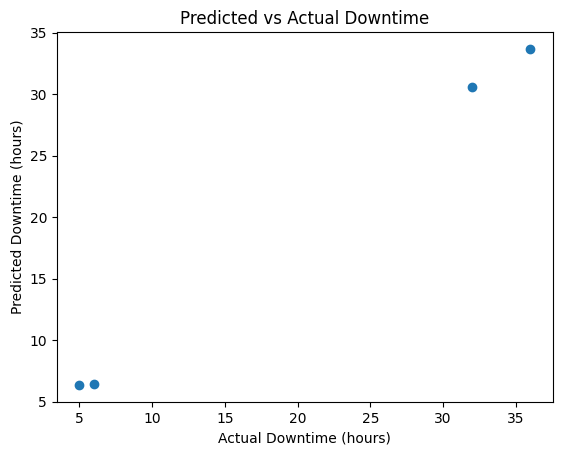

In [16]:
# Plot the predicted vs actual downtime values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Downtime (hours)')
plt.ylabel('Predicted Downtime (hours)')
plt.title('Predicted vs Actual Downtime')
plt.show()

## Result

The value of accuracy is a decimal between 0 and 1, with higher values indicating more accurate predictions. In this case, a value of 0.99 would indicate that the model's predictions were accurate 99% of the time, which can be confirmed from the plot between 'Actual Downtime (hours)' vs 'Predicted Downtime (hours)'. This would indicate that the model is performing well and thus can be trusted for next month's predictions.

The value of maintenance_cost_reduction is 114479.30, which indicates that the model's predictions are resulting in a reduction in maintenance costs of approximately ₦114,479.30.